# Visualization Explorations (Week 04)
## Michael Criste
For this week's assignment I am aiming to develop my visualization skills to enrich graphs and charts that I am able to make with the data available to me through the census and other sources.

As always, I will begin by loading the libraries I am most likely to use and my data sets:

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
age_adopt = gpd.read_file('data/acs2019_1yr_B28005_16000US0644000.geojson')

Before I begin any analysis or manipulation, I need to get a sense of the data I am working with. Since I intended to make a stacked bar chart I am looking at computer access and internet subscription in relation to age across the city of Los Angeles. This dataset should not be too large

In [3]:
age_adopt.shape

(1, 41)

In [4]:
age_adopt.head()

,geoid,name,B28005001,"B28005001, Error",B28005002,"B28005002, Error",B28005003,"B28005003, Error",B28005004,"B28005004, Error",...,"B28005015, Error",B28005016,"B28005016, Error",B28005017,"B28005017, Error",B28005018,"B28005018, Error",B28005019,"B28005019, Error",geometry
0,16000US0644000,"Los Angeles, CA",3885625.0,5578.0,800901.0,14465.0,788025.0,15021.0,222.0,191.0,...,11490.0,1549.0,561.0,388032.0,11406.0,44885.0,3804.0,71299.0,4821.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


Just for fun, I wonder what the data looks like?

<AxesSubplot:>

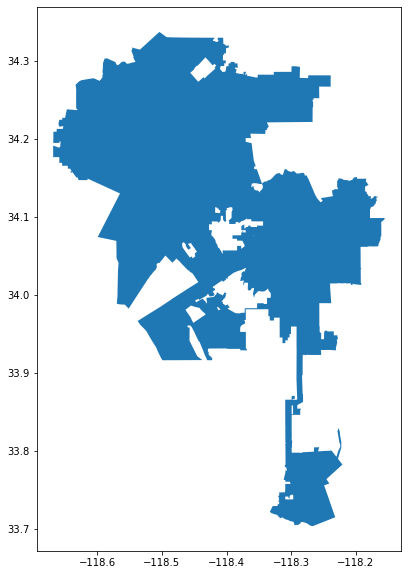

In [5]:
age_adopt.plot(figsize=(10,10))

Certainly looks like the City of Los Angeles. Since the data is at the city level (and I have narrowed my spatial scope) there is only one row in the data but multiple columns...I should find out what those columns are, simplify them, and relable them.

In [6]:
age_adopt.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1 non-null      object  
 1   name              1 non-null      object  
 2   B28005001         1 non-null      float64 
 3   B28005001, Error  1 non-null      float64 
 4   B28005002         1 non-null      float64 
 5   B28005002, Error  1 non-null      float64 
 6   B28005003         1 non-null      float64 
 7   B28005003, Error  1 non-null      float64 
 8   B28005004         1 non-null      float64 
 9   B28005004, Error  1 non-null      float64 
 10  B28005005         1 non-null      float64 
 11  B28005005, Error  1 non-null      float64 
 12  B28005006         1 non-null      float64 
 13  B28005006, Error  1 non-null      float64 
 14  B28005007         1 non-null      float64 
 15  B28005007, Error  1 non-null      float64 
 16  B28005008         1 no

In [7]:
list(age_adopt)

['geoid',
 'name',
 'B28005001',
 'B28005001, Error',
 'B28005002',
 'B28005002, Error',
 'B28005003',
 'B28005003, Error',
 'B28005004',
 'B28005004, Error',
 'B28005005',
 'B28005005, Error',
 'B28005006',
 'B28005006, Error',
 'B28005007',
 'B28005007, Error',
 'B28005008',
 'B28005008, Error',
 'B28005009',
 'B28005009, Error',
 'B28005010',
 'B28005010, Error',
 'B28005011',
 'B28005011, Error',
 'B28005012',
 'B28005012, Error',
 'B28005013',
 'B28005013, Error',
 'B28005014',
 'B28005014, Error',
 'B28005015',
 'B28005015, Error',
 'B28005016',
 'B28005016, Error',
 'B28005017',
 'B28005017, Error',
 'B28005018',
 'B28005018, Error',
 'B28005019',
 'B28005019, Error',
 'geometry']

In [8]:
age_adopt_col2keep = ['geoid',
 'name',
 'B28005001',
 'B28005002',
 'B28005003',
 'B28005004',
 'B28005005',
 'B28005006',
 'B28005007',
 'B28005008',
 'B28005009',
 'B28005010',
 'B28005011',
 'B28005012',
 'B28005013',
 'B28005014',
 'B28005015',
 'B28005016',
 'B28005017',
 'B28005018',
 'B28005019',
 'geometry']

In [9]:
age_adopt = age_adopt[age_adopt_col2keep]

In [10]:
list(age_adopt)

['geoid',
 'name',
 'B28005001',
 'B28005002',
 'B28005003',
 'B28005004',
 'B28005005',
 'B28005006',
 'B28005007',
 'B28005008',
 'B28005009',
 'B28005010',
 'B28005011',
 'B28005012',
 'B28005013',
 'B28005014',
 'B28005015',
 'B28005016',
 'B28005017',
 'B28005018',
 'B28005019',
 'geometry']

In [11]:
age_adopt.columns=['geoid',
 'name',
 'Total',
 'Under 18 years',
 '<18, Has a computer',
 '<18, With dial-up Internet subscription alone',
 '<18, With a broadband Internet subscription',
 '<18, Without an Internet subscription',
 '<18, No computer',
 '18 to 64 years',
 '18-64, Has a computer',
 '18-64, With dial-up Internet subscription alone',
 '18-64, With a broadband Internet subscription',
 '18-64, Without an Internet subscription',
 '18-64, No computer',
 '65 years and over',
 '65, Has a computer',
 '65, With dial-up Internet subscription alone',
 '65, With a broadband Internet subscription',
 '65, Without an Internet subscription',
 '65, No computer',
 'geometry']
age_adopt.head()

,geoid,name,Total,Under 18 years,"<18, Has a computer","<18, With dial-up Internet subscription alone","<18, With a broadband Internet subscription","<18, Without an Internet subscription","<18, No computer",18 to 64 years,...,"18-64, With a broadband Internet subscription","18-64, Without an Internet subscription","18-64, No computer",65 years and over,"65, Has a computer","65, With dial-up Internet subscription alone","65, With a broadband Internet subscription","65, Without an Internet subscription","65, No computer",geometry
0,16000US0644000,"Los Angeles, CA",3885625.0,800901.0,788025.0,222.0,745718.0,42085.0,12876.0,2578959.0,...,2378932.0,145935.0,52365.0,505765.0,434466.0,1549.0,388032.0,44885.0,71299.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


Now that we have made the data more accessible, we should normalize it. Since the data is divided into buckets within buckets it is important to note how the percentages are calculate and how they will be used. Since I want to compare access to device and subscription across ages, I will normalize those columns against the specific age column.

In [12]:
age_adopt['Percent with a computer under 18 years']=age_adopt['<18, Has a computer']/age_adopt['Under 18 years']*100
age_adopt['Percent with a computer and dial-up internet subscription under 18 years']=age_adopt['<18, With dial-up Internet subscription alone']/age_adopt['Under 18 years']*100
age_adopt['Percent with a computer and broadband internet subscription under 18 years']=age_adopt['<18, With a broadband Internet subscription']/age_adopt['Under 18 years']*100
age_adopt['Percent with a computer and no internet subscription under 18 years']=age_adopt['<18, Without an Internet subscription']/age_adopt['Under 18 years']*100
age_adopt['Percent with no computer under 18 years']=age_adopt['<18, No computer']/age_adopt['Under 18 years']*100
age_adopt['Percent with a computer between 18 and 64 years']=age_adopt['<18, Has a computer']/age_adopt['18 to 64 years']*100
age_adopt['Percent with a computer and dial-up internet subscription between 18 and 64 years']=age_adopt['18-64, With dial-up Internet subscription alone']/age_adopt['18 to 64 years']*100
age_adopt['Percent with a computer and broadband internet subscription between 18 and 64 years']=age_adopt['18-64, With a broadband Internet subscription']/age_adopt['18 to 64 years']*100
age_adopt['Percent with a computer and no internet subscription between 18 and 64 years']=age_adopt['18-64, Without an Internet subscription']/age_adopt['18 to 64 years']*100
age_adopt['Percent with a no computer between 18 and 64']=age_adopt['18-64, No computer']/age_adopt['18 to 64 years']*100
age_adopt['Percent with a computer over 65 years']=age_adopt['65, Has a computer']/age_adopt['65 years and over']*100
age_adopt['Percent with a computer and dial-up internet subscription over 65 years']=age_adopt['65, With dial-up Internet subscription alone']/age_adopt['65 years and over']*100
age_adopt['Percent with a computer and broadband internet subscription over 65 years']=age_adopt['65, With a broadband Internet subscription']/age_adopt['65 years and over']*100
age_adopt['Percent with a computer and no internet subscription over 65 years']=age_adopt['65, Without an Internet subscription']/age_adopt['65 years and over']*100
age_adopt['Percent with a no computer over 65']=age_adopt['65, No computer']/age_adopt['65 years and over']*100
age_adopt.head()

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,geoid,name,Total,Under 18 years,"<18, Has a computer","<18, With dial-up Internet subscription alone","<18, With a broadband Internet subscription","<18, Without an Internet subscription","<18, No computer",18 to 64 years,...,Percent with a computer between 18 and 64 years,Percent with a computer and dial-up internet subscription between 18 and 64 years,Percent with a computer and broadband internet subscription between 18 and 64 years,Percent with a computer and no internet subscription between 18 and 64 years,Percent with a no computer between 18 and 64,Percent with a computer over 65 years,Percent with a computer and dial-up internet subscription over 65 years,Percent with a computer and broadband internet subscription over 65 years,Percent with a computer and no internet subscription over 65 years,Percent with a no computer over 65
0,16000US0644000,"Los Angeles, CA",3885625.0,800901.0,788025.0,222.0,745718.0,42085.0,12876.0,2578959.0,...,30.555934,0.066965,92.243886,5.658679,2.03047,85.902741,0.306269,76.721798,8.874675,14.097259


With the normalized data added to the table, I am going to remove the previous columns that are not necessary for the chart I want to make.

In [13]:
age_normal_col2keep=['geoid',
                     'name',
                     'Percent with a computer and dial-up internet subscription under 18 years',
                     'Percent with a computer and broadband internet subscription under 18 years',
                     'Percent with a computer and no internet subscription under 18 years',
                     'Percent with no computer under 18 years',
                     'Percent with a computer and dial-up internet subscription between 18 and 64 years',
                     'Percent with a computer and broadband internet subscription between 18 and 64 years',
                     'Percent with a computer and no internet subscription between 18 and 64 years',
                     'Percent with a no computer between 18 and 64',
                     'Percent with a computer and dial-up internet subscription over 65 years',
                     'Percent with a computer and broadband internet subscription over 65 years',
                     'Percent with a computer and no internet subscription over 65 years',
                     'Percent with a no computer over 65',
                      'geometry']

In [14]:
age_adopt=age_adopt[age_normal_col2keep]

In [15]:
list(age_adopt)

['geoid',
 'name',
 'Percent with a computer and dial-up internet subscription under 18 years',
 'Percent with a computer and broadband internet subscription under 18 years',
 'Percent with a computer and no internet subscription under 18 years',
 'Percent with no computer under 18 years',
 'Percent with a computer and dial-up internet subscription between 18 and 64 years',
 'Percent with a computer and broadband internet subscription between 18 and 64 years',
 'Percent with a computer and no internet subscription between 18 and 64 years',
 'Percent with a no computer between 18 and 64',
 'Percent with a computer and dial-up internet subscription over 65 years',
 'Percent with a computer and broadband internet subscription over 65 years',
 'Percent with a computer and no internet subscription over 65 years',
 'Percent with a no computer over 65',
 'geometry']

In [16]:
age_adopt.head()

,geoid,name,Percent with a computer and dial-up internet subscription under 18 years,Percent with a computer and broadband internet subscription under 18 years,Percent with a computer and no internet subscription under 18 years,Percent with no computer under 18 years,Percent with a computer and dial-up internet subscription between 18 and 64 years,Percent with a computer and broadband internet subscription between 18 and 64 years,Percent with a computer and no internet subscription between 18 and 64 years,Percent with a no computer between 18 and 64,Percent with a computer and dial-up internet subscription over 65 years,Percent with a computer and broadband internet subscription over 65 years,Percent with a computer and no internet subscription over 65 years,Percent with a no computer over 65,geometry
0,16000US0644000,"Los Angeles, CA",0.027719,93.109885,5.254707,1.607689,0.066965,92.243886,5.658679,2.03047,0.306269,76.721798,8.874675,14.097259,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


Now the real challange begins...lets make a stacked bar chart

<AxesSubplot:>

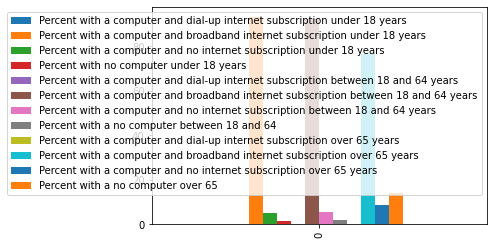

In [17]:
#First, I'll start by making a simple bar chart and work up from there.
age_adopt.plot.bar()

In [18]:
#kind of a mess, but it is a start. Below was a trial to stack the bars by following posts on Stack Overflow and Youtube. While I was able to troubleshoot some errors, I could not navigate around all of them.

#x = ["Under 18 Years Old","Between 18 and 64 Years Old","Over 65 Years Old"]
#Percent_comp_dialup = [age_adopt.iloc[0,2],age_adopt.iloc[0,6],age_adopt.iloc[0,10]]
#Percent_comp_braodband = [age_adopt.iloc[0,3],age_adopt.iloc[0,7],age_adopt.iloc[0,11]]
#Percent_comp_nointernet = [age_adopt.iloc[0,4],age_adopt.iloc[0,8],age_adopt.iloc[0,12]]
#Percent_nocomp = [age_adopt.iloc[0,5],age_adopt.iloc[0,9],age_adopt.iloc[0,13]]

#b_nointernet = list(np.add(Percent_comp_dialup, Percent_comp_braodband))
#b_nocomp = list(np.add(b_nointernet, Percent_comp_nointernet))

#plt.bar(x, Percent_comp_dialup, label ='Percent with a computer and dial-up internet subscription')
#plt.bar(x, Percent_comp_braodband, bottom ='Percent_comp_dialup', label ='Percent with a computer and broadband subscription')
#plt.bar(x, Percent_comp_nointernet, bottom ='b_nointernet', label ='Percent with a computer and no internet subscription')
#plt.bar(x, Percent_nocomp, bottom ='b_nocomp', label ='Percent with no computer')

#plt.xlabel('Age')
#plt.ylabel('Percent')
#plt.title('Percent of Computer Ownership and Internet Access by Age')

In [19]:
#I must confess I *phoned a friend* to help me navigate how to create a stacked bar chart using just pandas which has proven to be successful but more limited when trying to control the visual attributes.
age_adopt.columns

Index(['geoid', 'name',
       'Percent with a computer and dial-up internet subscription under 18 years',
       'Percent with a computer and broadband internet subscription under 18 years',
       'Percent with a computer and no internet subscription under 18 years',
       'Percent with no computer under 18 years',
       'Percent with a computer and dial-up internet subscription between 18 and 64 years',
       'Percent with a computer and broadband internet subscription between 18 and 64 years',
       'Percent with a computer and no internet subscription between 18 and 64 years',
       'Percent with a no computer between 18 and 64',
       'Percent with a computer and dial-up internet subscription over 65 years',
       'Percent with a computer and broadband internet subscription over 65 years',
       'Percent with a computer and no internet subscription over 65 years',
       'Percent with a no computer over 65', 'geometry'],
      dtype='object')

In [31]:
#In this step I am going to further reduce the available columns for plotting
col=['Percent with a computer and dial-up internet subscription under 18 years',
       'Percent with a computer and broadband internet subscription under 18 years',
       'Percent with a computer and no internet subscription under 18 years',
       'Percent with no computer under 18 years',
       'Percent with a computer and dial-up internet subscription between 18 and 64 years',
       'Percent with a computer and broadband internet subscription between 18 and 64 years',
       'Percent with a computer and no internet subscription between 18 and 64 years',
       'Percent with a no computer between 18 and 64',
       'Percent with a computer and dial-up internet subscription over 65 years',
       'Percent with a computer and broadband internet subscription over 65 years',
       'Percent with a computer and no internet subscription over 65 years',
       'Percent with a no computer over 65']

In [32]:
temp=age_adopt[col].T.reset_index().rename(columns={'index':'status',0:'percent'})

In [33]:
group_col=['Under 18',
       'Under 18',
       'Under 18',
       'Under 18',
       'Between 18 and 64 years',
       'Between 18 and 64 years',
       'Between 18 and 64 years',
       'Between 18 and 64 years',
       'Over 65 years',
       'Over 65 years',
       'Over 65 years',
       'Over 65 years',]

In [34]:
temp.loc[:,'Age Group'] = group_col

In [24]:
temp

,status,percent,Age Group
0,Percent with a computer and dial-up internet s...,0.027719,Under 18
1,Percent with a computer and broadband internet...,93.109885,Under 18
2,Percent with a computer and no internet subscr...,5.254707,Under 18
3,Percent with no computer under 18 years,1.607689,Under 18
4,Percent with a computer and dial-up internet s...,0.066965,Between 18 and 64 years
5,Percent with a computer and broadband internet...,92.243886,Between 18 and 64 years
6,Percent with a computer and no internet subscr...,5.658679,Between 18 and 64 years
7,Percent with a no computer between 18 and 64,2.030470,Between 18 and 64 years
8,Percent with a computer and dial-up internet s...,0.306269,Over 65 years
9,Percent with a computer and broadband internet...,76.721798,Over 65 years


<AxesSubplot:xlabel='Age Group'>

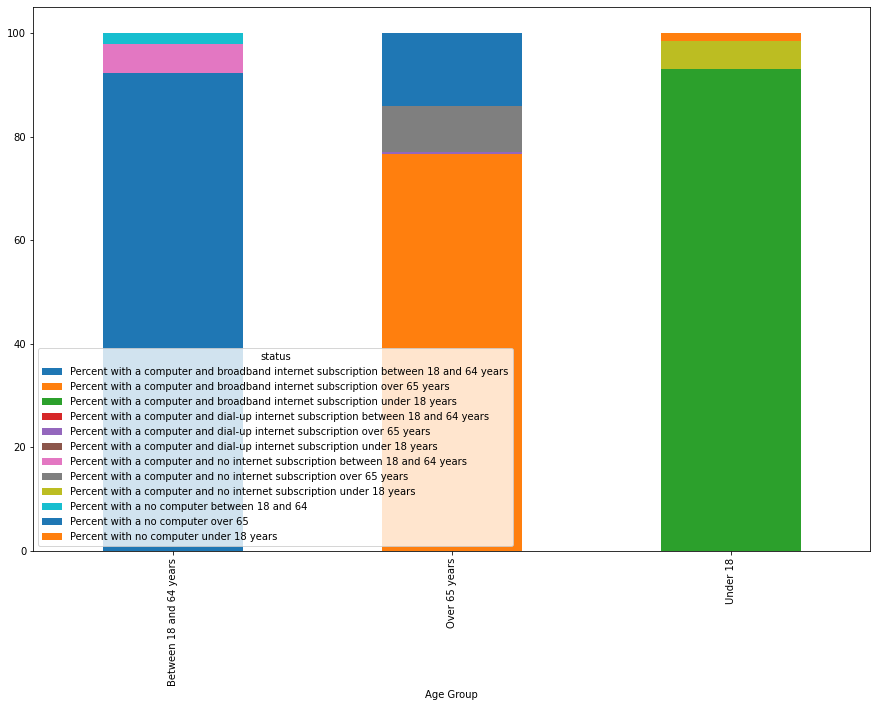

In [35]:
age_adopt_b = temp.copy()
age_adopt_b.groupby(['Age Group','status']).percent.first().unstack().plot(kind='bar', stacked=True, figsize=(15,10))

In [36]:
age_adopt_b.groupby(['Age Group','status']).percent.first().unstack()

status,Percent with a computer and broadband internet subscription between 18 and 64 years,Percent with a computer and broadband internet subscription over 65 years,Percent with a computer and broadband internet subscription under 18 years,Percent with a computer and dial-up internet subscription between 18 and 64 years,Percent with a computer and dial-up internet subscription over 65 years,Percent with a computer and dial-up internet subscription under 18 years,Percent with a computer and no internet subscription between 18 and 64 years,Percent with a computer and no internet subscription over 65 years,Percent with a computer and no internet subscription under 18 years,Percent with a no computer between 18 and 64,Percent with a no computer over 65,Percent with no computer under 18 years
Age Group,,,,,,,,,,,,
Between 18 and 64 years,92.243886,NaN,NaN,0.066965,NaN,NaN,5.658679,NaN,NaN,2.03047,NaN,NaN
Over 65 years,NaN,76.721798,NaN,NaN,0.306269,NaN,NaN,8.874675,NaN,NaN,14.097259,NaN
Under 18,NaN,NaN,93.109885,NaN,NaN,0.027719,NaN,NaN,5.254707,NaN,NaN,1.607689


<AxesSubplot:xlabel='Age Group'>

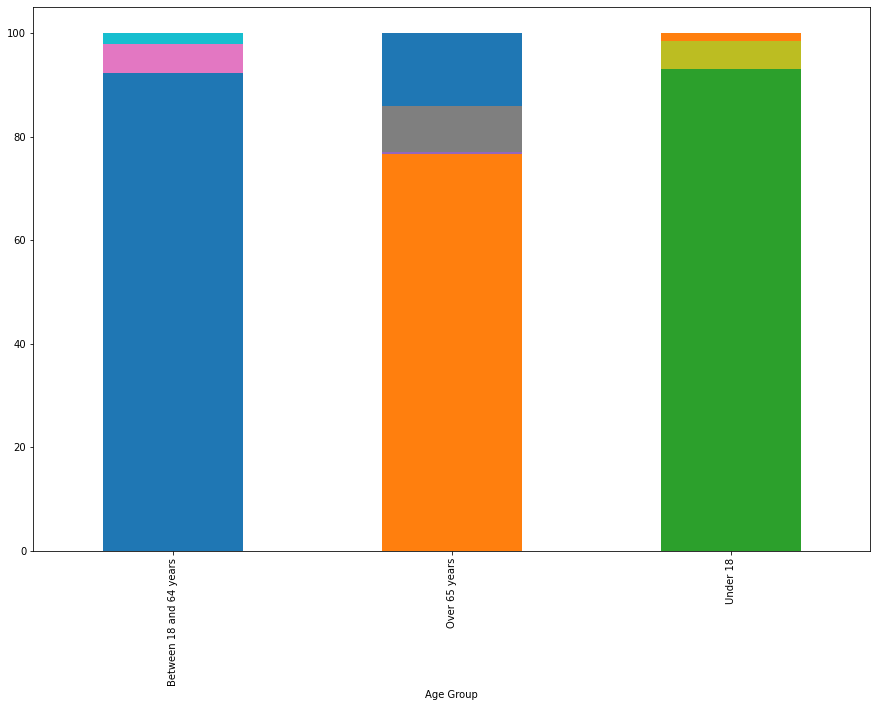

In [38]:
from matplotlib import pyplot as plt

age_adopt_b.groupby(['Age Group','status']).percent.first().unstack().plot(
    kind='bar', 
    stacked=True, 
    figsize=(15,10),
    legend=False,)